# Feature engineering

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium

full = pd.read_csv('../data/full_dataset.csv')

pd.options.display.max_columns = None

In [137]:
full.head()

,movie_title,duration,genres,language,country,content_rating,budget,genre_Drama,genre_Comedy,genre_Romance,genre_Thriller,genre_Crime,genre_Action,genre_Adventure,genre_Horror,genre_Family,genre_Fantasy,genre_Other,director_name,actor_1_name,actor_2_name,actor_3_name,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,gross,imdb_score,movie_facebook_likes,num_critic_for_reviews,num_voted_users,num_user_for_reviews,gross_margin
0,The Spanish Prisoner,110.0,Drama|Mystery|Thriller,English,USA,PG,10000000.0,True,False,False,True,False,False,False,False,False,False,True,David Mamet,Ben Gazzara,Felicity Huffman,Campbell Scott,342.0,623.0,508.0,393.0,1722,10200000.0,7.3,578,97.0,18697,263.0,0.020000
1,Oceans,104.0,Documentary|Drama,French,France,G,40000000.0,True,False,False,False,False,False,False,False,False,False,True,Jacques Perrin,Pedro Armendáriz Jr.,Jacques Perrin,Rie Miyazawa,63.0,67.0,63.0,7.0,152,19406406.0,7.8,0,113.0,7630,42.0,-0.514840
2,Exorcist: The Beginning,125.0,Horror|Mystery|Thriller,English,USA,R,50000000.0,False,False,False,True,False,False,False,True,False,False,True,Renny Harlin,James D'Arcy,Alan Ford,Izabella Scorupco,212.0,613.0,422.0,394.0,1970,41814863.0,5.1,893,167.0,28635,308.0,-0.163703
3,First Knight,134.0,Action|Adventure|Romance|Thriller,English,USA,PG-13,55000000.0,False,False,True,True,False,True,True,False,False,False,False,Jerry Zucker,Julia Ormond,Ben Cross,John Gielgud,109.0,919.0,303.0,249.0,1695,37600435.0,5.9,0,53.0,55350,180.0,-0.316356
4,This Is It,111.0,Documentary|Music,English,USA,PG,60000000.0,False,False,False,False,False,False,False,False,False,False,True,Kenny Ortega,Misha Gabriel Hamilton,Mekia Cox,Judith Hill,197.0,433.0,208.0,6.0,679,71844424.0,7.3,0,136.0,33158,223.0,0.197407


## 0. Historic financials

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


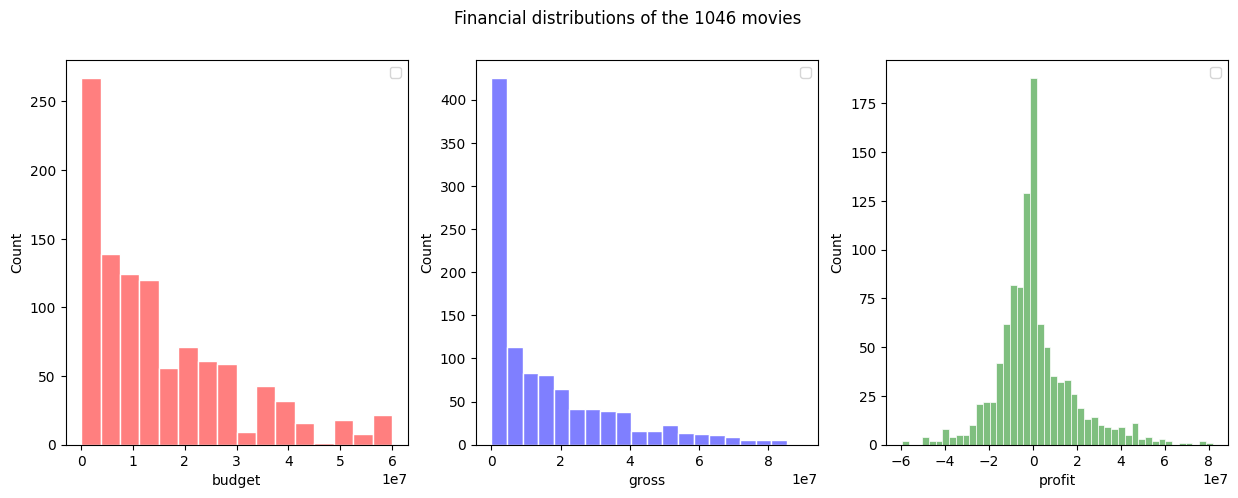

In [138]:
# Make a sns.kdeplot with two columns of the dataset
full["profit"] = full["gross"] - full["budget"]

financials = ["budget", "gross", "profit"]
colors = ["r", "b", "g"]
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, ax in enumerate(axs):
    sns.histplot(
        data=full, x=financials[i], ax=ax,
        fill=True, alpha=0.5, color= colors[i], edgecolor='white')
    ax.legend()
plt.suptitle(f'Financial distributions of the {full.shape[0]} movies')
plt.show()

## 1. Genres

In [139]:
full["genres_list"] = full["genres"].apply(lambda x: x.split("|"))
genre_counts = full["genres_list"].explode().value_counts()/full.shape[0]
# Create new columns with the top 10 genres
if not full.columns.str.contains("genre_").any():
    for genre in genre_counts.index[:10]:
        full["genre_"+genre] = full["genres_list"].apply(lambda x: genre in x)
    full["genre_Other"] = full["genres_list"].apply(lambda x: set(x).intersection(set(genre_counts.index[10:])) != set())

full.head()

,movie_title,duration,genres,language,country,content_rating,budget,genre_Drama,genre_Comedy,genre_Romance,genre_Thriller,genre_Crime,genre_Action,genre_Adventure,genre_Horror,genre_Family,genre_Fantasy,genre_Other,director_name,actor_1_name,actor_2_name,actor_3_name,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,gross,imdb_score,movie_facebook_likes,num_critic_for_reviews,num_voted_users,num_user_for_reviews,gross_margin,profit,genres_list
0,The Spanish Prisoner,110.0,Drama|Mystery|Thriller,English,USA,PG,10000000.0,True,False,False,True,False,False,False,False,False,False,True,David Mamet,Ben Gazzara,Felicity Huffman,Campbell Scott,342.0,623.0,508.0,393.0,1722,10200000.0,7.3,578,97.0,18697,263.0,0.020000,200000.0,"[Drama, Mystery, Thriller]"
1,Oceans,104.0,Documentary|Drama,French,France,G,40000000.0,True,False,False,False,False,False,False,False,False,False,True,Jacques Perrin,Pedro Armendáriz Jr.,Jacques Perrin,Rie Miyazawa,63.0,67.0,63.0,7.0,152,19406406.0,7.8,0,113.0,7630,42.0,-0.514840,-20593594.0,"[Documentary, Drama]"
2,Exorcist: The Beginning,125.0,Horror|Mystery|Thriller,English,USA,R,50000000.0,False,False,False,True,False,False,False,True,False,False,True,Renny Harlin,James D'Arcy,Alan Ford,Izabella Scorupco,212.0,613.0,422.0,394.0,1970,41814863.0,5.1,893,167.0,28635,308.0,-0.163703,-8185137.0,"[Horror, Mystery, Thriller]"
3,First Knight,134.0,Action|Adventure|Romance|Thriller,English,USA,PG-13,55000000.0,False,False,True,True,False,True,True,False,False,False,False,Jerry Zucker,Julia Ormond,Ben Cross,John Gielgud,109.0,919.0,303.0,249.0,1695,37600435.0,5.9,0,53.0,55350,180.0,-0.316356,-17399565.0,"[Action, Adventure, Romance, Thriller]"
4,This Is It,111.0,Documentary|Music,English,USA,PG,60000000.0,False,False,False,False,False,False,False,False,False,False,True,Kenny Ortega,Misha Gabriel Hamilton,Mekia Cox,Judith Hill,197.0,433.0,208.0,6.0,679,71844424.0,7.3,0,136.0,33158,223.0,0.197407,11844424.0,"[Documentary, Music]"


## 2. Country distribution

In [140]:
country_view = full.groupby("country").agg({
    "movie_title": "count",
    "duration": "mean",
    "language": pd.Series.mode,
    "budget": "mean",
    "gross": "mean",
    "imdb_score": "mean"
})

country_view.columns = [
    "Number of movies",
    "Mean duration",
    "Most frequent language",
    "Mean movie budget",
    "Mean box office",
    "Mean IMDB score"
]
country_view[["Mean duration","Mean movie budget","Mean box office"]] = country_view[
    ["Mean duration","Mean movie budget","Mean box office"]].apply(lambda x: round(x,0), axis=1)
country_view["Mean IMDB score"] = country_view["Mean IMDB score"].apply(lambda x: round(x,2))

country_view["NAME"] = country_view.index

countries_shape = gpd.read_file("../data/countries_shape/ne_110m_admin_0_countries.shp")

countries_shape = countries_shape[["NAME", "POP_EST", "GDP_MD", "geometry"]]
countries_shape.NAME = countries_shape.NAME.str.replace("United States of America", "USA")
countries_shape.NAME = countries_shape.NAME.str.replace("United Kingdom", "UK")
countries_shape.NAME = countries_shape.NAME.str.replace("Czechia", "Czech Republic")

# # We don't have shapes for Hong Kong or Aruba
countries_full = countries_shape.merge(country_view, on="NAME")
countries_full = countries_full.map(lambda x: x.tolist() if isinstance(x, np.ndarray) else x)

countries_full.columns
countries_full.rename(columns={
        "NAME": "Country",
        "POP_EST": "Estimated population",
        "GDP_MD": "Estimated GDP (Mln$)",  
    }, inplace=True)


In [141]:
# set the figure size of the map
map_title = "The world of movies"
title_html = """
    <h3>{map_title}</h3>
    <p>Explore the map and click on countries to see the details</p>
""".format(map_title=map_title)

m = folium.Map(width=700, height=300)
m.get_root().html.add_child(folium.Element(title_html))

m = countries_full.explore(
    m=m,
    column="Country",
    scheme="naturalbreaks",
    tooltip= [
        "Country",
    ],
    popup=[
        "Country",
        "Estimated population",
        "Estimated GDP (Mln$)",
        "Number of movies",
        "Mean duration",
        "Most frequent language",
        "Mean movie budget",
        "Mean box office",
        "Mean IMDB score"
    ],
    tooltip_kwds=dict(labels=False),
    name="Countries",
    legend=False
)

folium.TileLayer("CartoDB positron", show=True).add_to(m)
folium.LayerControl(collapsed=True).add_to(m)

display(m)

## 2. Networks

In [142]:
import networkx as nx

# Create a source-target dataframe with the actors and movies
actor1 = full[["movie_title", "actor_1_name"]].rename(columns={"actor_1_name": "actor"})
actor2 = full[["movie_title", "actor_2_name"]].rename(columns={"actor_2_name": "actor"})
actor3 = full[["movie_title", "actor_3_name"]].rename(columns={"actor_3_name": "actor"})
actors = pd.concat([actor1, actor2, actor3], ignore_index=True)
actors["movie_title"] = actors["movie_title"].apply(lambda x: x.strip())

graph_data = actors.groupby("actor")["movie_title"].apply(list).reset_index()

In [143]:
g = nx.Graph()

for i, (actor, movies) in graph_data.iterrows():
    g.add_node(actor)
    print(f"{(i+1)/len(graph_data):.2%}", end="\r")
    for _, (actor2, movies2) in graph_data.iloc[i+1:].iterrows():
        common_movies = set(movies).intersection(set(movies2))
        if len(common_movies) > 0:
            g.add_edge(actor, actor2, weight=len(common_movies))



In [144]:
connections_actors = pd.DataFrame(g.degree())
connections_actors.columns = ["Actor", "Connections"]

In [145]:
betweenness_actors = pd.DataFrame(nx.betweenness_centrality(g), index=["Betweenness centrality"]).T
betweenness_actors["Actor"] = betweenness_actors.index
actors_info = betweenness_actors.merge(connections_actors, on="Actor")
actors_info.set_index("Actor", inplace=True)

In [146]:
actors_info.sort_values("Connections")

,Betweenness centrality,Connections
Actor,,
Amos Oz,0.000000,0
Don Brooks,0.000000,1
Bobby Kendall,0.000000,1
Daryl Hannah,0.000000,1
A. Michael Baldwin,0.000000,2
...,...,...
Paul Sorvino,0.026339,14
Larry Miller,0.030305,14
Bernie Mac,0.037991,14


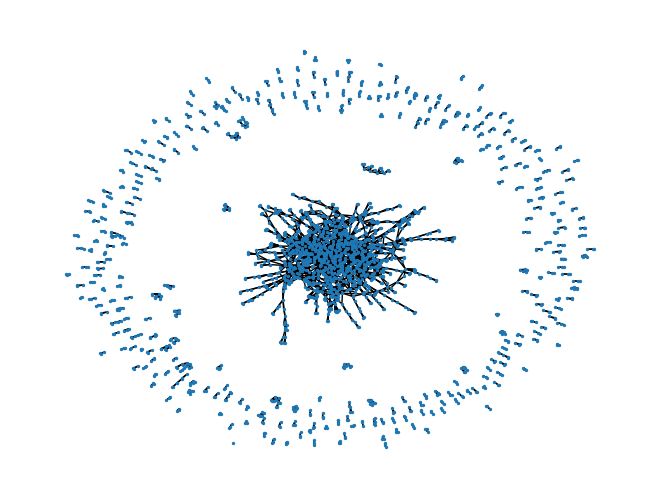

In [150]:
nx.draw(g, with_labels=False, node_size=2)